<a href="https://colab.research.google.com/github/AMbmwford72/TIM-8555-Assignments/blob/main/sem_assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Structural Equation Modeling (SEM) Assignment
This notebook performs Confirmatory Factor Analysis (CFA) and Path Analysis using Semopy. It also visualizes the structural equation model.

In [1]:
!pip install -q semopy graphviz==0.20 seaborn==0.13.2 --use-deprecated=legacy-resolver

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 15.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 100.2/100.2 kB 7.4 MB/s eta 0:00:00


In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Option 1 – Upload file manually
from google.colab import files
uploaded = files.upload()
df = pd.read_csv(next(iter(uploaded)))

# Option 2 – If file is on Google Drive
#from google.colab import drive
#drive.mount('/content/drive')
#df = pd.read_csv('/content/drive/MyDrive/path_to_dataset/response.csv')

# For demo purposes (remove in Colab)
#import io, requests, zipfile, os, tempfile, json
#print('Replace the data-loading section with your own path...')


Saving response.csv to response (3).csv


In [3]:
from semopy import Model, semplot, calc_stats
# Specify measurement and structural models
model_desc = '''
TSC =~ TSC1 + TSC2 + TSC3 + TSC4 + TSC5
TE  =~ TE1  + TE2  + TE3  + TE4  + TE5
EE  =~ EE1  + EE2  + EE3  + EE4  + EE5
DE  =~ DE1  + DE2  + DE3
RPA =~ RPA1 + RPA2 + RPA3 + RPA4 + RPA5

# Structural paths
EE  ~ TSC + TE + DE
RPA ~ EE
'''

mod = Model(model_desc)
res = mod.fit(df)
stats = calc_stats(mod)
print(stats)

       DoF  DoF Baseline        chi2  chi2 p-value  chi2 Baseline       CFI  \
Value  223           253  893.563708           0.0   10422.841861  0.934064   

            GFI      AGFI       NFI       TLI     RMSEA       AIC         BIC  \
Value  0.914269  0.902735  0.914269  0.925193  0.058622  103.9599  357.054303   

        LogLik  
Value  1.02005  


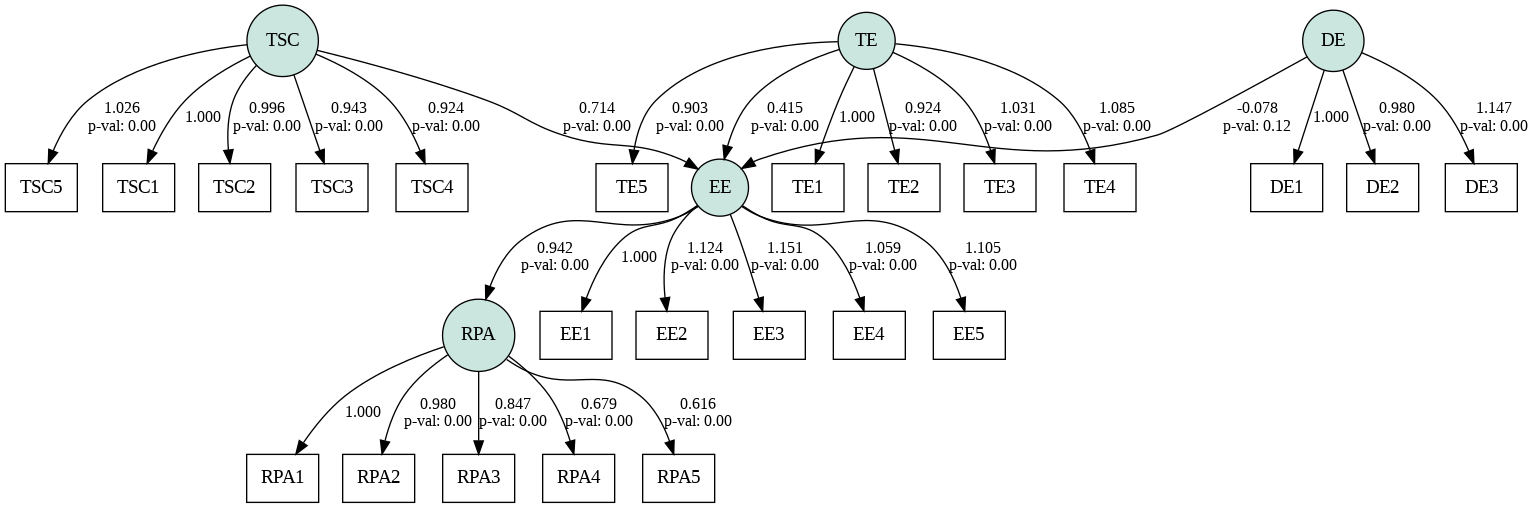

In [4]:
# Visualize SEM
semplot(mod, 'sem_diagram.png')
from IPython.display import Image
Image(filename='sem_diagram.png')

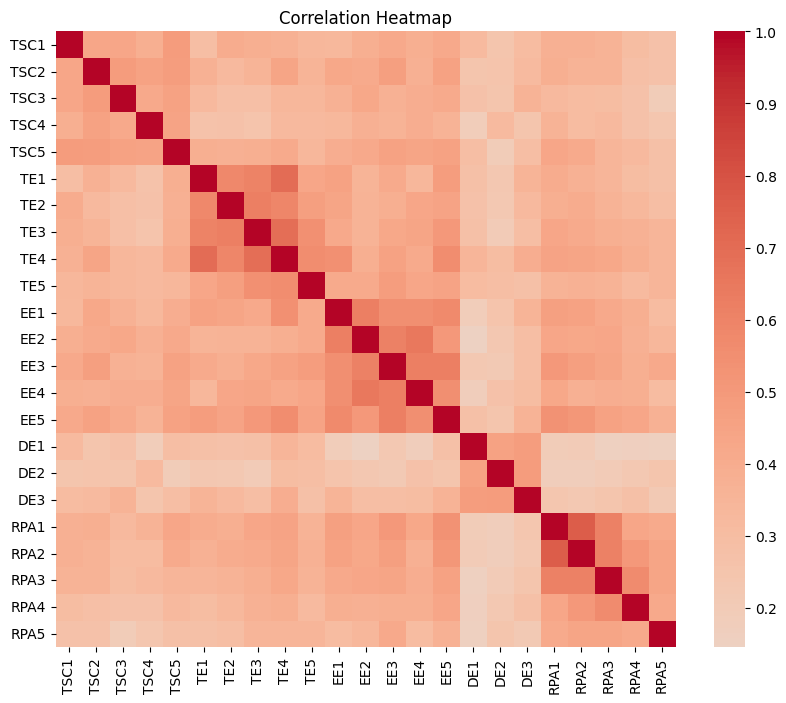

In [5]:
# Correlation heatmap of measured variables
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(), cmap='coolwarm', center=0)
plt.title('Correlation Heatmap')
plt.show()